# WeatherPy
----

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
import openweathermapy.core as owm
from urllib.error import HTTPError

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# If the city is unique, then add it to a our cities list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
            cities.append(city)
            
# Print the city count to confirm sufficient count
len(cities)

1406

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
# Create a settings dictionary with your API key and preferred units
settings = {"units":"imperial","appid":api_key}
# Convert list to DataFrame for opqenweathermapy
cities_df = pd.DataFrame.from_dict(cities)
cities_df.rename(columns={0:"City"},inplace=True)
cities_df.head()

,City
0,atuona
1,wasilla
2,praya
3,nishihara
4,pochutla


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-"*60)
ctr = 0
for each in cities:
    print(f"Retrieving current weather data for {each} | {ctr+1} of {len(cities)}...")
    try:
        response = owm.get_current(each, **settings)
    except HTTPError:
        print("No data for this city.")
    cities_df.loc[ctr,"Temperature F"] = response["main"]["temp"]
    cities_df.loc[ctr,"Humidity %"] = response["main"]["humidity"]
    cities_df.loc[ctr,"Cloudiness %"] = response["clouds"]["all"]
    cities_df.loc[ctr,"Wind Speed mph"] = response["wind"]["speed"]
    cities_df.loc[ctr,"Latitude"] = response["coord"]["lat"]
    cities_df.loc[ctr,"Longitude"] = response["coord"]["lon"]
    cities_df.loc[ctr,"Date"] = time.ctime(response["dt"])
    ctr += 1
print("-"*60)
print("Completed Data Retrieval")
print("-"*60)

Beginning Data Retrieval
------------------------------------------------------------
Retrieving current weather data for atuona | 1 of 1406...
Retrieving current weather data for wasilla | 2 of 1406...
Retrieving current weather data for praya | 3 of 1406...
Retrieving current weather data for nishihara | 4 of 1406...
Retrieving current weather data for pochutla | 5 of 1406...
Retrieving current weather data for yellowknife | 6 of 1406...
Retrieving current weather data for ushuaia | 7 of 1406...
Retrieving current weather data for sakaraha | 8 of 1406...
Retrieving current weather data for palmerston | 9 of 1406...
Retrieving current weather data for roald | 10 of 1406...
Retrieving current weather data for kaitangata | 11 of 1406...
Retrieving current weather data for mataura | 12 of 1406...
Retrieving current weather data for kavaratti | 13 of 1406...
Retrieving current weather data for ketchikan | 14 of 1406...
Retrieving current weather data for zarand | 15 of 1406...
Retrieving 

In [5]:
cities_df.to_csv(output_data_file,index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Plot Latitude vs. Temperature

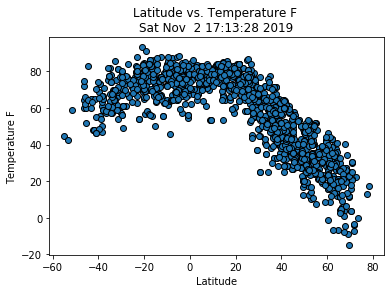

In [6]:
plt.scatter(cities_df["Latitude"],cities_df["Temperature F"],edgecolors="k")
plt.title(f"Latitude vs. Temperature F \n{cities_df.Date[0]}")
plt.ylabel("Temperature F")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Temperature_chart.png'))
plt.show()

### Plot Latitude vs. Humidity %

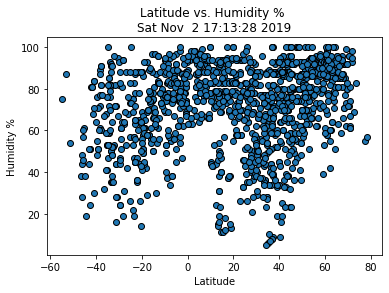

In [7]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity %"],edgecolors="k")
plt.title(f"Latitude vs. Humidity % \n{cities_df.Date[0]}")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Humidity_chart.png'))
plt.show()

## Plot Latitude vs. Cloudiness %

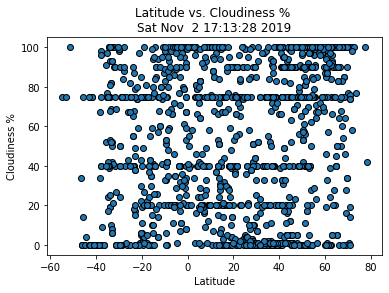

In [8]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness %"],edgecolors="k")
plt.title(f"Latitude vs. Cloudiness % \n{cities_df.Date[0]}")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Cloudiness_chart.png'))
plt.show()

## Plot Latitude vs. Wind Speed mph

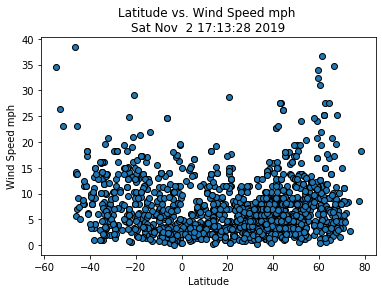

In [9]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed mph"],edgecolors="k")
plt.title(f"Latitude vs. Wind Speed mph \n{cities_df.Date[0]}")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Wind_Speed_chart.png'))
plt.show()

## Analysis of Obversed Trends
1. Around the equator the wind is fairly calm, the temperatures are typically the highest, and the humidity is higher than the rest.
2. The cloudiness seems to be stratified around different percentages, I wonder if this is due to types of clouds in the atmosphere.
3. There doesn't seem to be as many cities that are below -45 degrees Latitude, the data becomes much more sparse at this region of all the plots.